In [441]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [442]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

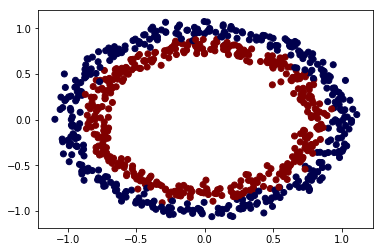

In [443]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap='seismic')

initial X
[[ 1.          0.19334616 -0.78778902]
 [ 1.         -0.89654571 -0.59439326]
 [ 1.         -0.32958334 -0.71141313]
 ...
 [ 1.          0.70576543 -0.43950537]
 [ 1.          0.64282435 -0.80159542]
 [ 1.         -0.3810643  -0.9380301 ]]
returned weights
[-3.94022497e-06  2.59702660e-03  3.05404350e-03]
-1.0909265836242774 1.0859617875160192
[-1.1103845466480622, 1.1098880046602482] [0.9455131951744437, -0.9425106240928047]


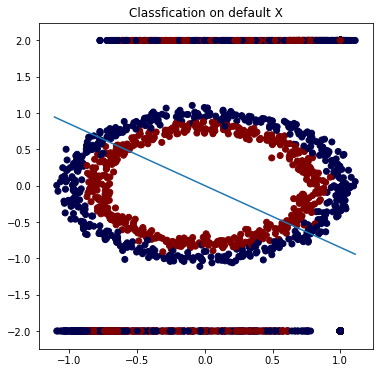

In [444]:
def get_weights(X, y):
    # Function to find the weight matrix    
    weight_matrix = np.zeros(1 + X.shape[1])
    pseudo_inv_matrix = np.linalg.pinv(X)
    weight_matrix = pseudo_inv_matrix.dot(y)
    return weight_matrix


def y_hat(X, weight_matrix):
    # Function to calculate the y_hat
    return (np.dot(X, np.transpose(weight_matrix)))


def predict_class(X, weight_matrix):
    # Function to predict the classification label for the input data X
    return np.sign(y_hat(X, weight_matrix)) 
def decision_boundary_line(x_min, x_max, weights):
    # Function to return [y_min, y_max] points of the decision boundary coordinates
    return [point_on_decision_boundary(x_min, weights), point_on_decision_boundary(x_max, weights)]


# Thanks Michel for the help here
def point_on_decision_boundary(x, weights):
    # Fucntion to find the y-pos on the boundary based on x-pos
    return -(weights[0] + weights[1]*x) / weights[2]      
def linear_classification(X, y, title=""):
    # Function to calulate the weights and plot the classification boundary
    
    # Insert bias to the input data X; x_0=1
    X = np.insert(X, 0, 1, axis=1)
    
    # Split data in train and test set with 20% samples as test data
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=y, random_state=42)
    print("initial X")
    print(X)
    # Get the weights for linear classifier from the train data
    weights = get_weights(X, y)
    print("returned weights")
    print(weights)
    # Create figure for plotting
    plt.figure(figsize=(6, 6))
    plt.title(title)
    
    # Plot the data samples, note X[:,0] is the Bias column
    plt.scatter(X[:,1], X[:,2], c=y, cmap='seismic')
    
    # Getting the X and Y position for the classification
    x_min, x_max = X.min(), X.max()
    print(minx, maxx)
    X_pos = [x_min, x_max]
    Y_pos = decision_boundary_line(x_min, x_max, weights)   
    print(X_pos, Y_pos)
    # Plot the decision boundary
    plt.plot(X_pos, Y_pos)  
    
    # Plot the classification of test data 
    # [multiply by 2 to the predicted test data for avoiding data overlap]
    # Thanks to Michel for this plot
    plt.scatter(X[:,1], predict_class(X, weights)*2, c=y, cmap='seismic')
    plt.scatter(X[:,0], predict_class(X, weights)*2, c=y, cmap='seismic')
    
    return weights  

# Run the classification on Original data
weights = linear_classification(X, y, title="Classfication on default X")

initial X
[[-0.45412965 -0.72615006]
 [-0.82759924  0.08823609]
 [ 0.02398674 -0.77566401]
 ...
 [-0.45707076 -0.77680949]
 [-0.02026065  1.03320964]
 [ 0.27752505  0.96118355]]
weigths
[ 9.36373694e-06 -5.66558365e-03 -3.09095747e-03]
predict X
-1.1293466837070851
predict X
1.1054506300634037
minx etc
-1.1293466837070851 1.1054506300634037 2.073070207690382 -2.0232110406725856


0.5

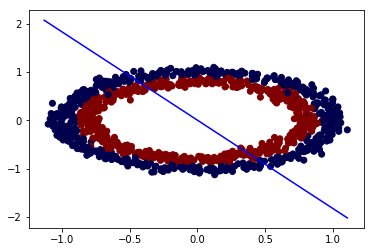

In [434]:
class LinearClassifier:
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)        
        pseudo_inv_matrix = np.linalg.pinv(X)
        weight_matrix = pseudo_inv_matrix.dot(y)
        self.w = weight_matrix
        print("weigths")
        print(self.w)
        
    def calculate_error(self, predictions, true):
        errors = 0
        for x,y in zip(predictions, true):
            if (x !=y):
                errors+=1
        return 1 - errors / len(predictions)

    def predict_class(self, X):
        X = np.insert(X, 0, 1, axis=1)
        # Function to predict the classification label for the input data X
        return np.sign(np.dot(X, np.transpose(self.w)))
    
    def predict(self, X, threshold=0.5):
        print("predict X")
        print(X)
        return -(self.w[0]+self.w[1]*X)/self.w[2]
    
    def plot(self, X, Y):
        X = np.insert(X, 0, 1, axis=1)
        plt.scatter(X[:,1],X[:,2], c=Y, cmap='seismic')
        minx = X.min()
        maxx = X.max()
        miny = self.predict(minx) 
        maxy = self.predict(maxx) 
        print("minx etc")
        print(minx, maxx, miny, maxy)
        plt.plot([minx, maxx], [miny, maxy], color='blue')
        
        
print("initial X")
print(X)
clf = LinearClassifier()
clf.fit(X, y)
clf.plot(X, y)
pred = clf.predict_class(X)
clf.calculate_error(pred, y)

#plotting values 


The accuracy score is dissapointing as the dataset is not linearly seperable. We will attempt to improve the accuracy score by creating a new feature by applying a linear transformation

weigths
[ 3.60376448 -4.37567014 -4.30564013]
predict X
3.1708041696697455e-05
predict X
1.275423932000191
minx etc
3.1708041696697455e-05 1.275423932000191 0.8369546969058029 -0.45918141608442187
error: 
0.982


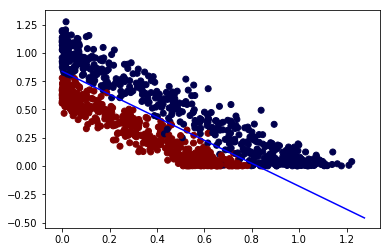

In [440]:
X2 = X * X
clf2 = LinearClassifier()
clf2.fit(X2, y)
clf2.plot(X2, y)
pred = clf2.predict_class(X2)
print("error: ")
print(clf2.calculate_error(pred, y))


This is a much better score, however we cannot 'guarantee' that this will generalise well as we have broken the VC bound by data snooping. I will complete some more transformations now to compare. 

In [422]:
x0_mean = X[:,0].mean()
x1_mean = X[:,1].mean()
distance_from_mean = np.sqrt(abs(X[:,0] - x0_mean)) +  np.sqrt(abs(X[:,1] - x1_mean))

In [423]:
X_new = X * X


weigths
[ 3.60376448 -4.37567014 -4.30564013]
predict X
3.1708041696697455e-05
predict X
1.275423932000191
minx etc
3.1708041696697455e-05 1.275423932000191 0.8369546969058029 -0.45918141608442187


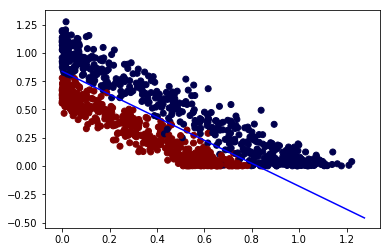

In [424]:
clf = LinearClassifier()
clf.fit(X_new, y)
clf.plot(X_new, y)

new feature improved accuracy

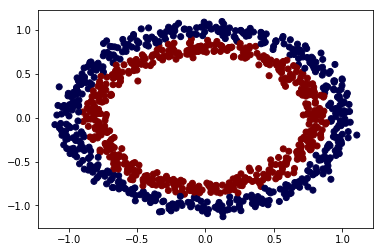

0.982


In [425]:
clf = LogisticRegression()
clf.fit(X2, y)
y_pred = clf.predict(X2)
plt.scatter(X[:,0],X[:,1], c=y_pred, cmap='seismic')
plt.show()
print(accuracy_score(y_pred, y))